# ADS - Network analysis module, homework 1

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## Task 1. Analysis of Les Miserables network 

In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('datahw/lesmis.gml')

### Q1. Visualize the network below with node labes and sizes proportional to node degree

In [3]:
gdict = dict(G.degree())

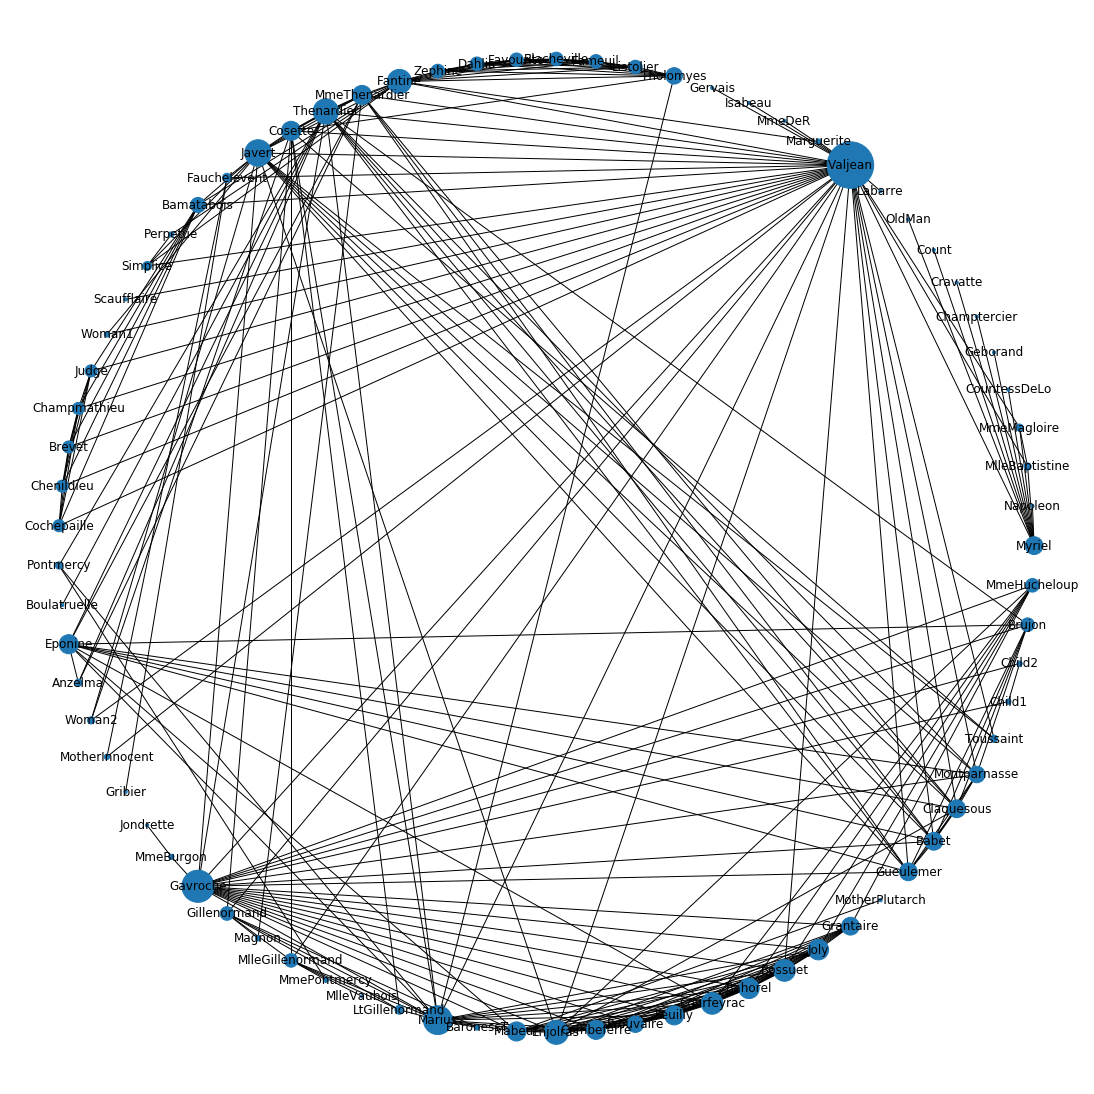

In [90]:
np.random.seed(2011)
plt.figure(figsize = (15,15))
nx.draw_circular(G, node_size=10*np.array(list(gdict.values()))**1.5, with_labels = True)


### Q2. Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

In [7]:
from heapq import nlargest

In [8]:
lar = nlargest(5, gdict, key = gdict.get)
for val in lar:
    print(val + ":" + str(gdict.get(val)))

Valjean:36
Gavroche:22
Marius:19
Javert:17
Thenardier:16


In [9]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1} : {2}'.format(i+1,ind[i],d[ind[i]]))
    return ind

In [10]:
mc1=dict(nx.degree(G))
ind1=topdict(mc1,5)

1|Valjean : 36
2|Gavroche : 22
3|Marius : 19
4|Javert : 17
5|Thenardier : 16


In [11]:
mc3 = nx.betweenness_centrality(G)
ind3=topdict(mc3,5)

1|Valjean : 0.5699890527836184
2|Myriel : 0.17684210526315788
3|Gavroche : 0.16511250242584766
4|Marius : 0.132032488621946
5|Fantine : 0.12964454098819422


### Q3. Analyze stability of Pagerank centrality
Analyze the impact of parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

In [12]:
mc2 = nx.pagerank(G,0.95)
ind2=topdict(mc2,5)

1|Valjean : 0.0747043161907721
2|Gavroche : 0.03955288718377238
3|Marius : 0.03430243839798216
4|Myriel : 0.0334606288129395
5|Javert : 0.0323959317526778


In [13]:
mc2 = nx.pagerank(G,0.9)
ind2=topdict(mc2,5)

1|Valjean : 0.07570137903943519
2|Myriel : 0.039655318611340286
3|Gavroche : 0.03739018829226064
4|Marius : 0.03238365765284897
5|Javert : 0.03134631873222991


In [14]:
mc2 = nx.pagerank(G,0.85)
ind2=topdict(mc2,5)

1|Valjean : 0.07543374445332472
2|Myriel : 0.042803439760757324
3|Gavroche : 0.035764123431619346
4|Marius : 0.03089270192040647
5|Javert : 0.030302597127170365


In [15]:
mc2 = nx.pagerank(G,0.8)
ind2=topdict(mc2,5)

1|Valjean : 0.07442184631334865
2|Myriel : 0.04434110258590558
3|Gavroche : 0.03435748592585355
4|Marius : 0.029597643233466888
5|Javert : 0.02926406217500744


In [16]:
mc2 = nx.pagerank(G,0.7)
ind2=topdict(mc2,5)

1|Valjean : 0.0709527717328387
2|Myriel : 0.0448978476113381
3|Gavroche : 0.03176794006501972
4|Marius : 0.027267015891693083
5|Javert : 0.02720525409804276


In [17]:
mc2 = nx.pagerank(G,0.6)
ind2=topdict(mc2,5)

1|Valjean : 0.06608136478461614
2|Myriel : 0.04355003256779984
3|Gavroche : 0.02923250385990771
4|Javert : 0.025172680359553327
5|Marius : 0.02508717905007231


In [18]:
mc2 = nx.pagerank(G,0.5)
ind2=topdict(mc2,5)

1|Valjean : 0.06005481871540172
2|Myriel : 0.04097024120161402
3|Gavroche : 0.02665831656391426
4|Javert : 0.023162138282418525
5|Marius : 0.022975207552848865


In [19]:
mc2 = nx.pagerank(G,0.4)
ind2=topdict(mc2,5)

1|Valjean : 0.052944826778737804
2|Myriel : 0.03742525493100431
3|Gavroche : 0.02402389288577136
4|Javert : 0.021163905231402717
5|Marius : 0.020905025746071025


In [20]:
mc2 = nx.pagerank(G,0.3)
ind2=topdict(mc2,5)

1|Valjean : 0.04474921315308957
2|Myriel : 0.03295546624663094
3|Gavroche : 0.021329496596520198
4|Javert : 0.019164883853087056
5|Thenardier : 0.019058776576435447


In [21]:
mc2 = nx.pagerank(G,0.2)
ind2=topdict(mc2,5)

1|Valjean : 0.03541949380202516
2|Myriel : 0.027495120006737393
3|Gavroche : 0.018583426528045174
4|Thenardier : 0.017185865426148868
5|Javert : 0.01714898428962244


In [22]:
mc2 = nx.pagerank(G,0.1)
ind2=topdict(mc2,5)

1|Valjean : 0.024870471094876317
2|Myriel : 0.020910423735306046
3|Gavroche : 0.01579776348483299
4|Thenardier : 0.015167220377215374
5|Javert : 0.015097087285362508


Between 0.8 and 0.9 appear to be the most stable page-ranks

### Task 2 (World airports). 
a) Find connected components, report their number and the sizes.  

b) In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

c) Find maximum and average network distance of the shortest path (number of edges, ragardless of size) between all pairs of the airports from the largest connected component. 

In [23]:
cities = pd.read_csv( 'datahw/citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [35]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [36]:
#now read the links
links = pd.read_csv( 'data/citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [37]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [38]:
#add edges to the network
Flights.add_edges_from(edgelist)

a) Find connected components, report their number and the sizes.  

In [29]:
size(links, 0)

30594

In [39]:
#create a dictionary of city locations
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}

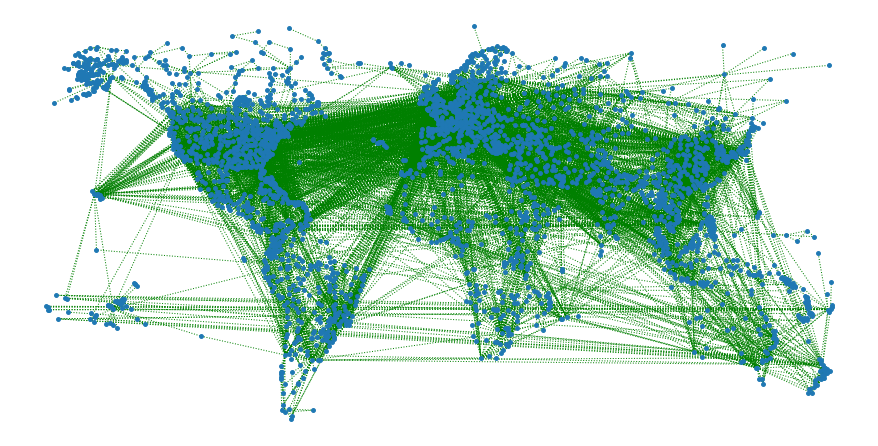

In [40]:
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [42]:
nx.number_connected_components(Flights)

4

In [46]:
[len(c) for c in sorted(nx.connected_components(Flights), key=len, reverse=True)]

[2981, 3, 2, 2]

b) In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$).  

In [47]:
largest_cc = max(nx.connected_components(Flights), key=len)

In [59]:
FlightsCC=list(nx.connected_component_subgraphs(Flights))

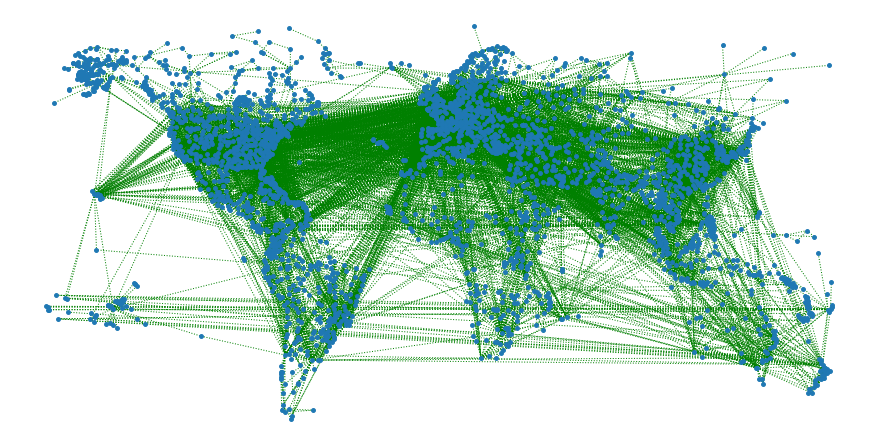

In [61]:
plt.figure(figsize = (12,6))
nx.draw(FlightsCC[0],pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [62]:
#output top tn centrality scores, given the dictionary d
def topdictCC(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1} : {2}'.format(i+1,ind[i],d[ind[i]]))
    return ind

In [67]:
mc1=dict(nx.degree(FlightsCC[0]))
ind1=topdictCC(mc1,10)

1|London : 311
2|Paris : 267
3|Frankfurt : 232
4|Moscow : 229
5|Amsterdam : 208
6|Atlanta : 208
7|Chicago : 199
8|Beijing : 184
9|Istanbul : 181
10|Dallas-fort Worth : 181


In [68]:
mc2=dict(nx.betweenness_centrality(FlightsCC[0]))
ind2=topdictCC(mc2,10)

1|London : 0.09076727836638496
2|Anchorage : 0.08216371312591912
3|Paris : 0.07784192121669775
4|Moscow : 0.061038019702898814
5|Chicago : 0.05813492835186721
6|Frankfurt : 0.054523416417756765
7|Seattle : 0.052719585605351275
8|Dubai : 0.046442721998741124
9|Tokyo : 0.04585464478820619
10|Toronto : 0.04531466582661801


In [69]:
mc3=dict(nx.closeness_centrality(FlightsCC[0]))
ind3=topdictCC(mc3,10)

1|London : 0.42335559028271064
2|Frankfurt : 0.4174838890445503
3|Paris : 0.41637557635880956
4|Amsterdam : 0.4094531464688101
5|New York : 0.40053763440860213
6|Toronto : 0.39632929910892406
7|Los Angeles : 0.39601328903654487
8|Chicago : 0.3927253558249868
9|Dubai : 0.3926218708827404
10|Newark : 0.38964435146443516


In [71]:
mc4=dict(nx.pagerank(FlightsCC[0], 0.85))
ind4=topdictCC(mc4,10)

1|London : 0.006659290961342694
2|Moscow : 0.006409790102955394
3|Paris : 0.006295939941422261
4|Atlanta : 0.005016918307551103
5|Frankfurt : 0.0048027793856764015
6|Chicago : 0.004709824954255139
7|Dallas-fort Worth : 0.0046932158818892835
8|Denver : 0.00462642209344578
9|Houston : 0.004398380214052283
10|Amsterdam : 0.004312131801712511


c) Find maximum and average network distance of the shortest path (number of edges, ragardless of size) between all pairs of the airports from the largest connected component. 

In [76]:
long_flight = FlightsCC[0]

In [77]:
allpaths=dict(nx.shortest_path_length(long_flight))

In [80]:
diameter=0; i0=0; j0=0;
for i in allpaths.items():
  for j in i[1].items():
    if j[1]>diameter:
      diameter=j[1]
      i0=i[0]
      j0=j[0]  
print('{} - {} : {}'.format(long_flight[i0],long_flight[j0],diameter))

{'Attawapiskat': {}} - {'New Stuyahok': {}} : 12


In [81]:
print(nx.average_shortest_path_length(long_flight))

3.939842942663716
